# 1-7. 미니 프로젝트: 가위바위보 분류기 만들자

## 1. 데이터를 준비하자
가위, 바위, 보 이미지 각 100장을 준비한다.

In [184]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [185]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [186]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨: 0


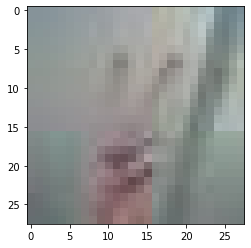

In [187]:
plt.imshow(x_train[0])
print('라벨:',y_train[0])

# 2. 딥러닝 네트워크 설계하기

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_37 (Dense)             (None, 10)              

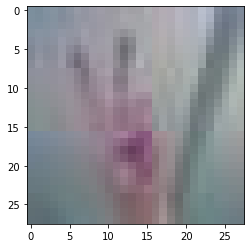

51 번째 이미지는 바로  0 입니다.


In [188]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=5

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#model.summary()
#model.compile(optimizer='adam',
    #         loss='sparse_categorical_crossentropy',
     #        metrics=['accuracy'])

model.summary()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])


index=50     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지는 바로 ',  y_train[index], '입니다.')

In [189]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 42.8943 - accuracy: 0.3033
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 3.4234 - accuracy: 0.3600
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1584 - accuracy: 0.4600
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8216 - accuracy: 0.6800
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8171 - accuracy: 0.6567
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7767
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.8467
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.8500
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3185 - accuracy: 0.9333
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.9200


In [190]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("시험데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

시험데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [191]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.2490 - accuracy: 0.6300
test_loss: 2.248965263366699 
test_accuracy: 0.6299999952316284


## 회고
### 프로젝트에서 어려웠던점
처음 프로젝트이고 아직 파이썬 언어에 대한 이해도가 떨어지기 때문에 코드 하나하나 완벽하게 이해 하는 점이 어려웠습니다.

### 프로젝트를 진행하면서 알아낸점 아직 모호한점
프로그램을 처음 돌렸을때 정확도가 40% 엿는데 같은 데이터로 프로그램만 계속 돌렸더니 정확도가 올라가는 것을 알게 되었습니다. 학습을 시키는 횟수가 반복하면 정확도가 올라가는 것을 알게 되었습니다.
아직 코드에 대한 이해도가 떨어져 왜 이렇게 코드를 작성했을까, 이해에 대한 부족함이 있습니다.

### 루브릭 평가 지표를 맞추기 위해 시도한 것들
학습 횟수를 증가시켰습니다. 

### 자기 다짐
파이썬 공부를 더 열심히 해서 빨리 코드에 대한 이해도를 높여야 겠다.